In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt
from copy import copy

In [3]:
file=r"\\claraserv3\CameraImages\2020\11\18\VIRTUAL_CATHODE_2020-11-18_9-55-34_1images.hdf5"

In [4]:
hdf = h5py.File(file,'r')

In [5]:
image=hdf['Capture000001'][:]

In [6]:
imageData = np.array(image)
# Do we flip it or not??
#imageData = np.flip(np.transpose(np.array(imageData)), 1)

In [7]:
imageData.min()

52

In [8]:
def imageBackground(imageData, center, radius):
    x, y = center
    backgroundArea = imageData[y-radius:y+radius,x-radius:x+radius]
    return backgroundArea.max()

In [9]:
imageBackground(imageData, (50,50),50)

113

In [10]:
def scaleImage(imageData, background=None):
    if background is None:
        background = imageData.min()
    image = imageData.copy()
    image = image.clip(min=background)
    image -= background
    scale = max(image.min(), image.max(), key=abs)
    image = image/scale*255
    return image

In [11]:
def cropImage(imageData, xy1, xy2):
    x1, y1 = xy1
    x2, y2 = xy2
    return imageData[y1:y2,x1:x2]    

In [12]:
def cropImageCenter(imageData, center, radius):
    x, y = center
    return imageData[y-radius:y+radius,x-radius:x+radius]    

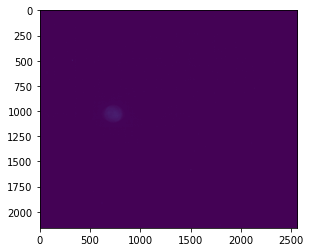

In [13]:
plt.imshow(imageData)

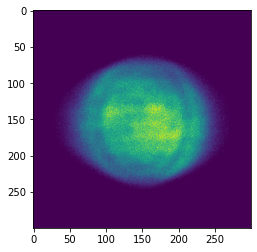

In [14]:
newImageData=scaleImage(cropImageCenter(imageData, (725,1025),150), imageBackground(imageData, (50,50),50))
plt.imshow(newImageData)

In [15]:
pxmmCalibration=1/0.0060 # Taken from the wiki
pxmmCalibration

166.66666666666666

In [16]:
image = Image.fromarray(newImageData)
image = image.convert('L')
image.save('testVC.bmp')

In [17]:
newImageData

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])